# 0. Initial Setup and Imports


In [1]:
import torchvision
from torchvision import transforms, datasets
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from PIL import Image
import random
import os
from torchvision.utils import save_image
import shutil
import cv2
import imutils
import math
use_cuda = True

In [24]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [25]:
cd /content/gdrive/MyDrive/Colab Notebooks/APS360/Project

/content/gdrive/MyDrive/Colab Notebooks/APS360/Project


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


# 1.0 Data Augmentaion and Splitting

## 1.1 Data Augmentaion

Don't run this code, Copying data from one file to the other incase of purge and new data needed

In [ ]:
# #PURGE CODE

# source_directory = '/content/gdrive/MyDrive/Colab Notebooks/APS360/Project/All_data_original'
# destination_directory = '/content/gdrive/MyDrive/Colab Notebooks/APS360/Project/All_data'

#  #Function to delete all contents, including subdirectories, in the destination folder
# def delete_contents(dst):
#     for item in os.listdir(dst):
#         item_path = os.path.join(dst, item)
#         if os.path.isdir(item_path):
#             # If it's a subdirectory, delete it and its contents
#             shutil.rmtree(item_path)
#         else:
#             # If it's a file, delete it
#             os.remove(item_path)

# # Function to copy all contents, including subdirectories
# def copy_contents(src, dst):
#     for item in os.listdir(src):
#         source_item = os.path.join(src, item)
#         destination_item = os.path.join(dst, item)

#         if os.path.isdir(source_item):
#             # If it's a subdirectory, create it in the destination and copy its contents
#             os.makedirs(destination_item, exist_ok=True)
#             copy_contents(source_item, destination_item)
#         else:
#             # If it's a file, copy it to the destination
#             shutil.copy(source_item, destination_item)

# # Call the function to delete contents in the destination folder
# delete_contents(destination_directory)
# # Call the function to copy contents
# copy_contents(source_directory, destination_directory)

In [3]:
data_path = '/content/gdrive/MyDrive/Colab Notebooks/APS360/Project/All_data'

overall_dataset = torchvision.datasets.ImageFolder(data_path)
classes = overall_dataset.classes

len_prev = len(overall_dataset)
print(len_prev)
print(overall_dataset.classes)

9997
['glioma', 'meningioma', 'notumor', 'pituitary']


DO NOT RUN MORE THAN ONCE:

This adds images to the "All_data" folder. Does not delete anything.

Incase of accident run purge code above

In [ ]:
# #image augmentation

# temp_dir = '/content/gdrive/MyDrive/Colab Notebooks/APS360/Project/Training_augmented'
# shutil.rmtree(temp_dir)
# os.makedirs(temp_dir, exist_ok=True)

# PIT = 3
# NO = 2
# MEN = 1
# GLI = 0

# class DeterministicRotation:
#     def __init__(self, degrees):
#         self.degrees = degrees

#     def __call__(self, x):
#         return x.rotate(self.degrees, resample=Image.BILINEAR)

# # Define the transformations
# rotation_transform = transforms.Compose([
#     transforms.Resize((224, 224)),
#     DeterministicRotation(90),
#     transforms.ToTensor()
# ])

# flip_transform = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.RandomVerticalFlip(p=1.0),  # Ensure 100% of images are flipped
#     transforms.ToTensor()
# ])

# # Apply transformations
# def apply_transform(data, transform, fraction=1):
#     # print("starting:", transform)
#     pit_count = 0
#     no_count = 0
#     men_count = 0
#     gli_count = 0
#     while (pit_count < 371 or gli_count < 439 or men_count < 427 or no_count < 250):
#       num_samples = int(len(data) * fraction)
#       indices = np.random.choice(len(data), num_samples, replace=False)
#       transformed_data = []
#       for i in indices:
#           image, label = data[i]  # This gives a PIL Image directly because of the dataset's transform
#           # print(image) # debug
#           # print(label) # debug
#           # transformed_img = transform(image)
#           # transformed_data.append((transformed_img, label))
#           if label == PIT:
#             if pit_count < 371:
#               pit_count += 1
#               transformed_img = transform(image)
#               transformed_data.append((transformed_img, label))
#           elif label == NO:
#             if no_count < 250:
#               no_count += 1
#               transformed_img = transform(image)
#               transformed_data.append((transformed_img, label))
#           elif label == MEN:
#             if men_count < 427:
#               men_count += 1
#               transformed_img = transform(image)
#               transformed_data.append((transformed_img, label))
#           elif label == GLI:
#             if gli_count < 439:
#               gli_count += 1
#               transformed_img = transform(image)
#               transformed_data.append((transformed_img, label))
#           else:
#               print("error")
#     return transformed_data, pit_count, no_count, men_count, gli_count


# def save_augmented_to_disk(data, path, classes, aug_type):
#     saved_paths = []
#     for i, (img_tensor, label) in enumerate(data):
#         class_dir = os.path.join(path, classes[label])
#         os.makedirs(class_dir, exist_ok=True)
#         file_name = os.path.join(class_dir, f"{aug_type}_{i}.png")
#         save_image(img_tensor, file_name)
#         saved_paths.append((file_name, label))
#     return saved_paths


# # Rotate 10% and add them back
# rotated_data, pit_count, no_count, men_count, gli_count = apply_transform(overall_dataset, rotation_transform)
# rotated_paths = save_augmented_to_disk(rotated_data, temp_dir, classes, "rotated")
# rotated_paths = save_augmented_to_disk(rotated_data, data_path, classes, "rotated")
# overall_dataset.samples.extend(rotated_paths)

# print("Rotated pitutary images = ", pit_count)
# print("Rotated no tumor images = ", no_count)
# print("Rotated meningioma images = ", men_count)
# print("Rotated glioma images = ", gli_count)

# # From this augmented dataset, flip another 10% and add them back
# flipped_data, pit_count, no_count, men_count, gli_count = apply_transform(overall_dataset, flip_transform)
# flipped_paths = save_augmented_to_disk(flipped_data, temp_dir, classes, "flipped")
# flipped_paths = save_augmented_to_disk(flipped_data, data_path, classes, "flipped")
# overall_dataset.samples.extend(flipped_paths)

# print("\nFlipped pitutary images = ", pit_count)
# print("Flipped no tumor images = ", no_count)
# print("Flipped meningioma images = ", men_count)
# print("Flipped glioma images = ", gli_count)

# overall_dataset.transform = transforms.Compose([transforms.Resize((224, 224)),
#                                 transforms.ToTensor()])

# # Optionally shuffle overall_dataset if desired
# random.shuffle(overall_dataset.samples)

# print("\nNumber of images in training dataset before augmentation = ", len_prev)
# print("Number of images in training dataset after augmentation = ", len(overall_dataset))

Rotated pitutary images =  371
Rotated no tumor images =  250
Rotated meningioma images =  427
Rotated glioma images =  439

Flipped pitutary images =  371
Flipped no tumor images =  250
Flipped meningioma images =  427
Flipped glioma images =  439

Number of images in training dataset before augmentation =  7023
Number of images in training dataset after augmentation =  9997


## 1.2 Data preprocessing and splitting

In [4]:
def crop_img(img):
	"""
	Finds the extreme points on the image and crops the rectangular out of them
	"""
	gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
	gray = cv2.GaussianBlur(gray, (3, 3), 0)

	# threshold the image, then perform a series of erosions +
	# dilations to remove any small regions of noise
	thresh = cv2.threshold(gray, 45, 224, cv2.THRESH_BINARY)[1]
	thresh = cv2.erode(thresh, None, iterations=2)
	thresh = cv2.dilate(thresh, None, iterations=2)

	# find contours in thresholded image, then grab the largest one
	cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
	cnts = imutils.grab_contours(cnts)
	c = max(cnts, key=cv2.contourArea)

	# find the extreme points
	extLeft = tuple(c[c[:, :, 0].argmin()][0])
	extRight = tuple(c[c[:, :, 0].argmax()][0])
	extTop = tuple(c[c[:, :, 1].argmin()][0])
	extBot = tuple(c[c[:, :, 1].argmax()][0])
	ADD_PIXELS = 0
	new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()

	return new_img

In [5]:
def clear_destination_folders(small=False):
  if not small:
    training_path = "./Training"
    validation_path = "./Validation"
    testing_path = "./Testing"
  else:
    training_path = "./Training_small"
    validation_path = "./Validation_small"
    testing_path = "./Testing_small"

  # Check if the folders exist before deleting them
  if os.path.exists(training_path):
      shutil.rmtree(training_path)
  if os.path.exists(validation_path):
      shutil.rmtree(validation_path)
  if os.path.exists(testing_path):
      shutil.rmtree(testing_path)

In [6]:
def preprocess(clear=True, small=False):

    # Clean up directory if necessary
    if clear:
        clear_destination_folders(small=small)

    # Define the split ratio for training, validation, and testing
    # 70% training, 15% validation, 15% testing
    if not small:
      split_ratio = (0.8, 0.1, 0.1)
    else:
      split_ratio = (0.35, 0.125, 0.125)

    # Define the root directory where your data is located
    root_dir = "./"

    # Define the directory containing the original data
    data_dir = os.path.join(root_dir, "All_data/")

    # Get a list of folders (classes of tumor) in the data directory
    folder_list = os.listdir(data_dir)

    # Define the directories for training, validation, and testing sets
    if not small:
      training_dir = os.path.join(root_dir, "Training/")
      validation_dir = os.path.join(root_dir, "Validation/")
      testing_dir = os.path.join(root_dir, "Testing/")
    else:
      training_dir = os.path.join(root_dir, "Training_small/")
      validation_dir = os.path.join(root_dir, "Validation_small/")
      testing_dir = os.path.join(root_dir, "Testing_small/")

    # Create training, validation, and testing directories if they don't exist
    os.makedirs(training_dir, exist_ok=True)
    os.makedirs(validation_dir, exist_ok=True)
    os.makedirs(testing_dir, exist_ok=True)

    total = 0
    count_train = 0
    count_train_class = 0
    count_valid = 0
    count_valid_class = 0
    count_test = 0
    count_test_class = 0

    IMG_SIZE = 224

    # Copy existing images into the newly created folders
    for folder in folder_list:

        # Create subdirectories for each tumor class in training, validation, and testing sets
        training_class_folder = os.path.join(training_dir, folder)
        validation_class_folder = os.path.join(validation_dir, folder)
        testing_class_folder = os.path.join(testing_dir, folder)

        os.makedirs(training_class_folder, exist_ok=True)
        os.makedirs(validation_class_folder, exist_ok=True)
        os.makedirs(testing_class_folder, exist_ok=True)

        # Get the path to the images of the current class
        images_path = os.path.join(data_dir, folder + '/')

        # List all the image files in the current class folder
        images_list = os.listdir(images_path)
        random.shuffle(images_list)

        count_train_class = 0
        count_valid_class = 0
        count_test_class = 0

        if (not small):
            for i in range(len(images_list)):
                source = os.path.join(images_path, images_list[i])
                img = cv2.imread(source)
                new_img = crop_img(img)
                new_img = cv2.resize(new_img, (IMG_SIZE, IMG_SIZE))
                # Determine the destination based on the split ratio
                if i < len(images_list) * split_ratio[0]:
                    destination = os.path.join(training_class_folder, images_list[i])
                    count_train += 1
                    count_train_class +=1
                elif i < len(images_list) * (split_ratio[0] + split_ratio[1]):
                    destination = os.path.join(validation_class_folder, images_list[i])
                    count_valid += 1
                    count_valid_class += 1
                else:
                    destination = os.path.join(testing_class_folder, images_list[i])
                    count_test += 1
                    count_test_class += 1

                # Copy the new_img to the appropriate set
                cv2.imwrite(destination, new_img)
                total += 1

        else:
            for i in range(len(images_list)):
                source = os.path.join(images_path, images_list[i])
                img = cv2.imread(source)
                new_img = crop_img(img)
                new_img = cv2.resize(new_img, (IMG_SIZE, IMG_SIZE))
                # Determine the destination based on the split ratio
                if i < len(images_list) * split_ratio[0]:
                    destination = os.path.join(training_class_folder, images_list[i])
                    count_train += 1
                    count_train_class +=1
                elif i < len(images_list) * (split_ratio[0] + split_ratio[1]):
                    destination = os.path.join(validation_class_folder, images_list[i])
                    count_valid += 1
                    count_valid_class += 1
                elif i < len(images_list) * (split_ratio[0] + split_ratio[1] + split_ratio[2]):
                    destination = os.path.join(testing_class_folder, images_list[i])
                    count_test += 1
                    count_test_class += 1
                else:
                    break

                # Copy the new_img to the appropriate set
                cv2.imwrite(destination, new_img)
                total += 1

        print(f"FOLDER: {folder} - Training images = {count_train_class}, Validation images = {count_valid_class}, Testing images = {count_test_class}")

    print("\n Total images =", total, "\n")
    print("Training images =", count_train, " percentage =", round(((count_train / total)*100),2))
    if not small:
        print("Validation images =", count_valid, " percentage =", round(((count_valid / total)*100),2))
        print("Testing images =", count_test, " percentage =", round(((count_test / total)*100),2))

In [ ]:
preprocess()

In [7]:
############ debug to see if overall_dataset contains all data before splitting by displaying all images in overall_dataset

# Function to display a tensor as an image
# def imshow(img_tensor, label):
#     img = np.transpose(img_tensor.numpy(), (1, 2, 0))
#     plt.imshow(img)
#     plt.title(label)
#     plt.pause(0.001)  # Pause to update the plot

# # Iterate through the overall_dataset and display each image
# for img_tensor, label_index in overall_dataset:
#     label = classes[label_index]
#     imshow(img_tensor, label)

In [8]:
def get_data_loader(batch_size=256, small=False):

  root_dir = "./"

  # Define the directory containing the original data
  data_dir = os.path.join(root_dir, "All_data/")

  # Get a list of folders (classes of tumor) in the data directory
  folder_list = os.listdir(data_dir)

  # Define the directories for training, validation, and testing sets
  if not small:
      training_dir = os.path.join(root_dir, "Training/")
      validation_dir = os.path.join(root_dir, "Validation/")
      testing_dir = os.path.join(root_dir, "Testing/")
  else:
      # training_dir = os.path.join(root_dir, "Training_small/")
      # validation_dir = os.path.join(root_dir, "Validation_small/")
      # testing_dir = os.path.join(root_dir, "Testing_small/")
      testing_dir = os.path.join(root_dir, "Small_test/")

  transform = transforms.Compose(
        [transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

  if not small:
    training_dataset = torchvision.datasets.ImageFolder(root=training_dir, transform=transform)
    validation_dataset = torchvision.datasets.ImageFolder(root=validation_dir, transform=transform)
  testing_dataset = torchvision.datasets.ImageFolder(root=testing_dir, transform=transform)

  if not small:
    training_loader = torch.utils.data.DataLoader(training_dataset, batch_size=batch_size, shuffle=True, num_workers=1)
    validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=batch_size, shuffle=True, num_workers=1)
  testing_loader = torch.utils.data.DataLoader(testing_dataset, batch_size=batch_size, shuffle=False, num_workers=1)

  if not small:
    return training_loader, validation_loader, testing_loader
  return testing_loader


In [ ]:
#debug for now, just to see the result from last 3 printing function
#train_loader, val_loader, test_loader = get_data_loader(256)

# 2.0 Baseline Model

In [ ]:
# preprocess(small=True)

In [ ]:
# train_loader, val_loader, test_loader = get_data_loader()

# # We will be using the training dataset to set a benchmark on how our model should perform for this brain tumor MRI dataset.
# # Enable GPU usage if available
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print(device)

# # Defining linear SVM model
# svm_model = SVC(kernel='linear', C=0.01, random_state=42)
# # svm_model = SVC(kernel='rbf', C=0.01, random_state=42)


# ### Train the SVM model ###
# X_train, y_train = None, None

# # Loads mini-batches of MRI images and their corresponding labels
# for i, data in enumerate(train_loader, 0):
#     images, labels = data

#     # Flatten images into a 1D array
#     images = images.view(images.size(0), -1).to(device)

#     # Move labels to device and then convert to Numpy array
#     #labels = labels.to(device)
#     #images = images.cpu().numpy()
#     labels = labels.to(device).cpu().numpy()

#     print("Batch", i ,"processed.")

#     if i == 0:
#         X_train, y_train = images.cpu().numpy(), labels
#     else:
#         X_train = np.concatenate([X_train, images.cpu().numpy()])
#         y_train = np.concatenate([y_train, labels])

#     # Release GPU memory
#     images = None
#     labels = None
#     torch.cuda.empty_cache()

# svm_model.fit(X_train, y_train)

In [ ]:
# # Evaluate the SVM model on the training set
# train_predictions = svm_model.predict(X_train)
# train_accuracy = accuracy_score(y_train, train_predictions)
# print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))

# # Load the validation and test data
# X_val, y_val = None, None
# X_test, y_test = None, None

# for images, labels in val_loader:
#     images = images.view(images.size(0), -1).numpy()
#     labels = labels.numpy()

#     if X_val is None:
#         X_val, y_val = images, labels
#     else:
#         X_val = np.concatenate([X_val, images])
#         y_val = np.concatenate([y_val, labels])

# # Loading and concatenating test data
# for images, labels in test_loader:
#     images = images.view(images.size(0), -1).numpy()
#     labels = labels.numpy()

#     if X_test is None:
#         X_test, y_test = images, labels
#     else:
#         X_test = np.concatenate([X_test, images])
#         y_test = np.concatenate([y_test, labels])

# # Evaluate the SVM model on the validation set
# val_predictions = svm_model.predict(X_val)
# val_accuracy = accuracy_score(y_val, val_predictions)
# print("Validation Accuracy: {:.2f}%".format(val_accuracy * 100))

# # Evaluate the SVM model on the test set
# test_predictions = svm_model.predict(X_test)
# test_accuracy = accuracy_score(y_test, test_predictions)
# print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

# 3.0 Primary Model

In [9]:
def get_accuracy(model, loader):
    data = loader

    correct = 0
    total = 0
    for imgs, labels in data:

        # ############################################
        # #To Enable GPU Usage
        # if use_cuda and torch.cuda.is_available():
        #  imgs = imgs.cuda()
        #  labels = labels.cuda()
        # ############################################


        output = model(imgs)

        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

In [10]:
### Code taken from Lab 2 ###

def get_model_name(name, batch_size, learning_rate, epoch):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learning_rate,
                                                   epoch)
    return path

def evaluate(net, loader, criterion):
    total_loss = 0.0
    total_err = 0.0
    total_epoch = 0
    all_predicted_labels = []
    all_labels = []

    text_label = ["glioma", "meningioma", "no tumor", "pitutary"]

    for i, data in enumerate(loader, 0):
        inputs, labels = data
        outputs = net(inputs)
        loss = criterion(outputs, labels)

        # Considered incorrect if index of output with highest probability isn't equal to label
        corr = torch.argmax(outputs, dim=1) != labels
        total_err += int(corr.sum())
        total_loss += loss.item()
        total_epoch += len(labels)

        # Get the predicted and ground truth labels
        predicted_labels = torch.argmax(outputs, dim=1)

        # Append predicted and ground truth labels for each batch
        all_predicted_labels.extend(predicted_labels.numpy())
        all_labels.extend(labels.numpy())

    # Calculate confusion matrix for the entire dataset
    conf_matrix = confusion_matrix(all_labels, all_predicted_labels, labels=[0, 1, 2, 3])
    print(conf_matrix)
    total_f_neg = conf_matrix[2][0] + conf_matrix[2][1] + conf_matrix[2][3]
    total = sum(conf_matrix[2])

    for lab in range(len(all_labels)):
      print("True label: ", text_label[all_labels[lab]], "Predicted label: ", text_label[all_predicted_labels[lab]])



    print(f"percentage of False Negatives: {total_f_neg/total}")

    err = float(total_err) / total_epoch
    loss = float(total_loss) / (i + 1)
    return err, loss


def plot_training_curve(path):
    """ Plots the training curve for a model run, given the csv files
    containing the train/validation error/loss.

    Args:
        path: The base path of the csv files produced during training
    """
    import matplotlib.pyplot as plt
    train_err = np.loadtxt("{}_train_err.csv".format(path))
    val_err = np.loadtxt("{}_val_err.csv".format(path))
    train_loss = np.loadtxt("{}_train_loss.csv".format(path))
    val_loss = np.loadtxt("{}_val_loss.csv".format(path))
    plt.title("Train vs Validation Error")
    n = len(train_err) # number of epochs
    plt.plot(range(1,n+1), train_err, label="Train")
    plt.plot(range(1,n+1), val_err, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.legend(loc='best')
    plt.show()
    plt.title("Train vs Validation Loss")
    plt.plot(range(1,n+1), train_loss, label="Train")
    plt.plot(range(1,n+1), val_loss, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()

In [11]:
def get_output_size(input_size, padding, kernel_size, stride):
  return math.floor((input_size + 2*padding - kernel_size) / stride) + 1

In [12]:
# Our CNN
class BrainTumorClassifier(nn.Module):
  def __init__(self, name="BrainTumorCNN", conv1_args=[3,5,3,1,0], conv2_args=[5,10,3,1,0], conv3_args=[10,20,3,1,0]): ## changed conv3_args from [5,10,3,1,0] to [10,20,3,1,0]
        super(BrainTumorClassifier, self).__init__()
        self.name = name
        self.conv1_args = conv1_args
        self.conv2_args = conv2_args
        self.conv3_args = conv3_args

        # Feature Extraction Attributes
        self.conv1 = nn.Conv2d(conv1_args[0], conv1_args[1], conv1_args[2], conv1_args[3], conv1_args[4])
        self.conv2 = nn.Conv2d(conv2_args[0], conv2_args[1], conv2_args[2], conv2_args[3], conv2_args[4])
        self.conv3 = nn.Conv2d(conv3_args[0], conv3_args[1], conv3_args[2], conv3_args[3], conv3_args[4])
        self.pool = nn.MaxPool2d(2, 2)

        # Layer dimensions - calculations to determine spatial dimensions of intermediate layers
        self.conv_dim1 = get_output_size(input_size=256, padding=conv1_args[4], kernel_size=conv1_args[2], stride=conv1_args[3])
        self.pool_dim1 = get_output_size(input_size=self.conv_dim1, padding=0, kernel_size=2, stride=2)
        self.bn1 = nn.BatchNorm2d(conv1_args[1])

        self.conv_dim2 = get_output_size(self.pool_dim1, padding=conv2_args[4], kernel_size=conv2_args[2], stride=conv2_args[3])
        self.pool_dim2 = get_output_size(input_size=self.conv_dim2, padding=0, kernel_size=2, stride=2)
        self.bn2 = nn.BatchNorm2d(conv2_args[1])

        self.conv_dim3 = get_output_size(self.pool_dim2, padding=conv3_args[4], kernel_size=conv3_args[2], stride=conv3_args[3])
        self.pool_dim3 = get_output_size(input_size=self.conv_dim3, padding=0, kernel_size=2, stride=2)
        self.bn3 = nn.BatchNorm2d(conv3_args[1])



        # Fully Connected Layers
        self.fc1 = nn.Linear(self.pool_dim3**2 * conv3_args[1], 32)
        self.bn4 = nn.BatchNorm1d(32)
        self.fc2= nn.Linear(32, 4)
        self.dropout_conv = nn.Dropout2d(0.25)
        self.dropout_fc = nn.Dropout(0.5)


  def forward(self, x):
      # x = self.pool(F.relu(self.bn1(self.conv1(x))))
      # # x = self.dropout_conv(x)
      # x = self.pool(F.relu(self.bn2(self.conv2(x))))
      # # x = self.dropout_conv(x)
      # x = self.pool(F.relu(self.bn3(self.conv3(x))))
      # x = self.dropout_conv(x)

      x = self.pool(F.relu(self.conv1(x)))
      # x = self.dropout_conv(x)
      x = self.pool(F.relu(self.conv2(x)))
      # x = self.dropout_conv(x)
      x = self.pool(F.relu(self.conv3(x)))
      x = self.dropout_conv(x)

      # flatten
      x = x.view(-1, self.pool_dim3**2 * self.conv3_args[1])

      # x = F.relu(self.bn4(self.fc1(x)))
      x = F.relu(self.fc1(x))
      x = self.dropout_fc(x)

      x = self.fc2(x)
      x = x.squeeze(1)
      return x

In [13]:
def train_net(net, batch_size=64, learning_rate=0.01, num_epochs=30, clear=True, small=False):
    ########################################################################
    # Fixed PyTorch random seed for reproducible result
    torch.manual_seed(1000)
    ########################################################################
    # Obtain the PyTorch data loader objects to load batches of the datasets
    if not small:
      train_loader, val_loader, test_loader = get_data_loader(batch_size=batch_size, small=False)
    else:
      train_loader, val_loader, test_loader = get_data_loader(batch_size=batch_size, small=small)
    ########################################################################
    # Define the Loss function and optimizer
    # The loss function will be Cross Entropy (CE). In this case we
    # will use the CrossEntropyLoss.
    # Optimizer will be Adam optimizer.
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(net.parameters(), lr=learning_rate)
    ########################################################################
    # Set up some numpy arrays to store the training/test loss/erruracy
    train_err = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_err = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)


    trainingAccuracy = np.zeros(num_epochs)
    validationAccuracy = np.zeros(num_epochs)
    ########################################################################
    # Train the network
    # Loop over the data iterator and sample a new batch of training data
    # Get the output from the network, and optimize our loss function.
    start_time = time.time()
    for epoch in range(num_epochs):  # loop over the dataset multiple times
        total_train_loss = 0.0
        total_train_err = 0.0
        totalTrainingAccuracy = 0.0
        total_epoch = 0
        for i, data in enumerate(train_loader, 0):
            # Get the inputs
            inputs, labels = data

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass, backward pass, and optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            # Calculate the statistics
            corr = torch.argmax(outputs, dim=1) != labels
            total_train_err += int(corr.sum())
            total_train_loss += loss.item()
            total_epoch += len(labels)
        train_err[epoch] = float(total_train_err) / total_epoch
        train_loss[epoch] = float(total_train_loss) / (i+1)
        trainingAccuracy[epoch] = get_accuracy(net, train_loader)
        validationAccuracy[epoch] = get_accuracy(net, val_loader)
        if not small:
          val_err[epoch], val_loss[epoch] = evaluate(net, val_loader, criterion)
          print(("Epoch {}: Train err: {}, Train loss: {}, Training Accuracy: {} |"+
                "Validation err: {}, Validation loss: {}, Validation Accuracy: {}").format(
                    epoch + 1,
                    train_err[epoch],
                    train_loss[epoch],
                    trainingAccuracy[epoch],
                    val_err[epoch],
                    val_loss[epoch],
                    validationAccuracy[epoch]))

        else:
          print(("Epoch {}: Train err: {}, Train loss: {} |").format(
                    epoch + 1,
                    train_err[epoch],
                    train_loss[epoch]))
        # Save the current model (checkpoint) to a file
        model_path = get_model_name(net.name, batch_size, learning_rate, epoch)
        torch.save(net.state_dict(), model_path)
    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))
    # Write the train/test loss/err into CSV file for plotting later
    epochs = np.arange(1, num_epochs + 1)
    np.savetxt("{}_train_err.csv".format(model_path), train_err)
    np.savetxt("{}_train_loss.csv".format(model_path), train_loss)
    np.savetxt("{}_trainingAccuracy.csv".format(model_path), trainingAccuracy)
    if not small:
      np.savetxt("{}_val_err.csv".format(model_path), val_err)
      np.savetxt("{}_val_loss.csv".format(model_path), val_loss)
      np.savetxt("{}_validationAccuracy.csv".format(model_path), validationAccuracy)


In [14]:
def plot_training_curve(path):
    """ Plots the training curve for a model run, given the csv files
    containing the train/validation error/loss.

    Args:
        path: The base path of the csv files produced during training
    """
    import matplotlib.pyplot as plt
    train_loss = np.loadtxt("{}_train_loss.csv".format(path))
    val_loss = np.loadtxt("{}_val_loss.csv".format(path))
    trainingAccuracy = np.loadtxt("{}_trainingAccuracy.csv".format(path))
    validationAccuracy = np.loadtxt("{}_validationAccuracy.csv".format(path))
    n = len(train_loss) # number of epochs

    # Plotting Train vs Validation Loss here
    plt.title("Train vs Validation Loss")
    plt.plot(range(1,n+1), train_loss, label="Train")
    plt.plot(range(1,n+1), val_loss, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()

    # Plotting Training vs Validation Accuracy here
    plt.title("Training vs Validation Accuracy")
    plt.plot(range(1,n+1), trainingAccuracy, label="Train")
    plt.plot(range(1,n+1), validationAccuracy, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.show()

In [ ]:
# Training the CNN

#testingModel = BrainTumorClassifier()
#train_net(testingModel, batch_size = 64, learning_rate = 0.0005, num_epochs=30)

testingModel = BrainTumorClassifier(name="BrainTumorCNN_channel_10_20_30_kernal_3", conv1_args=[3,10,3,1,0], conv2_args=[10,20,3,1,0], conv3_args=[20,30,3,1,0])
train_net(testingModel, batch_size = 64, learning_rate = 0.0005, num_epochs=30)

RuntimeError: ignored

In [ ]:
## Plotting the results
model_path = get_model_name("BrainTumorCNN", batch_size=64, learning_rate=0.0005, epoch=29)
plot_training_curve(model_path)

FileNotFoundError: ignored

Epoch 1: Train err: 0.4007352941176471, Train loss: 0.9806265389477765, Training Accuracy: 0.6920588235294117 |Validation err: 0.2921083627797409, Validation loss: 0.8071957400866917, Validation Accuracy: 0.6890459363957597
Epoch 2: Train err: 0.2748529411764706, Train loss: 0.7610489163133833, Training Accuracy: 0.7617647058823529 |Validation err: 0.26030624263839813, Validation loss: 0.6920991454805646, Validation Accuracy: 0.767962308598351
Epoch 3: Train err: 0.22691176470588234, Train loss: 0.6293416961475655, Training Accuracy: 0.794264705882353 |Validation err: 0.21201413427561838, Validation loss: 0.6148887702396938, Validation Accuracy: 0.7820965842167256
Epoch 4: Train err: 0.1935294117647059, Train loss: 0.5392305183189886, Training Accuracy: 0.8358823529411765 |Validation err: 0.2037691401648999, Validation loss: 0.5613865298884255, Validation Accuracy: 0.8056537102473498
Epoch 5: Train err: 0.1738235294117647, Train loss: 0.47657417975090166, Training Accuracy: 0.849264705

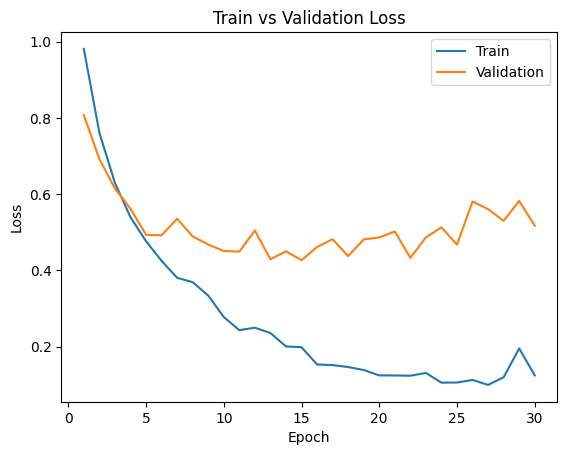

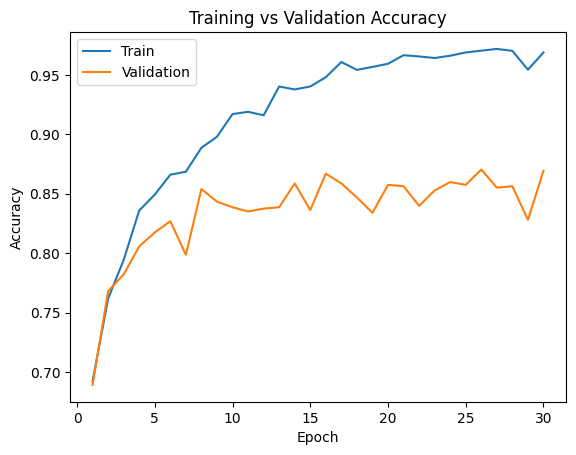

In [ ]:
testingModel = BrainTumorClassifier(name="BrainTumorCNN_channel_10_20_30_kernal_5", conv1_args=[3,10,5,1,0], conv2_args=[10,20,5,1,0], conv3_args=[20,30,5,1,0])
train_net(testingModel, batch_size = 128, learning_rate = 0.001, num_epochs=30)
model_path = get_model_name("BrainTumorCNN_channel_10_20_30_kernal_5", batch_size=128, learning_rate=0.001, epoch=29)
plot_training_curve(model_path)

Epoch 1: Train err: 0.4451470588235294, Train loss: 1.0637856699802257, Training Accuracy: 0.6689705882352941 |Validation err: 0.3297997644287397, Validation loss: 0.9198635071516037, Validation Accuracy: 0.6725559481743227
Epoch 2: Train err: 0.2911764705882353, Train loss: 0.8522482889669912, Training Accuracy: 0.7461764705882353 |Validation err: 0.23557126030624265, Validation loss: 0.771423950791359, Validation Accuracy: 0.7290930506478209
Epoch 3: Train err: 0.2401470588235294, Train loss: 0.7369238668017917, Training Accuracy: 0.7886764705882353 |Validation err: 0.20730270906949352, Validation loss: 0.71391361951828, Validation Accuracy: 0.7667844522968198
Epoch 4: Train err: 0.20073529411764707, Train loss: 0.641821168087147, Training Accuracy: 0.8286764705882353 |Validation err: 0.19905771495877503, Validation loss: 0.6355756223201752, Validation Accuracy: 0.800942285041225
Epoch 5: Train err: 0.1676470588235294, Train loss: 0.5650875435935127, Training Accuracy: 0.85 |Validati

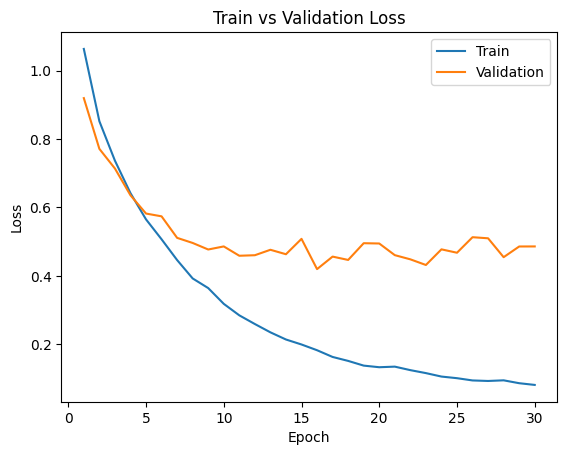

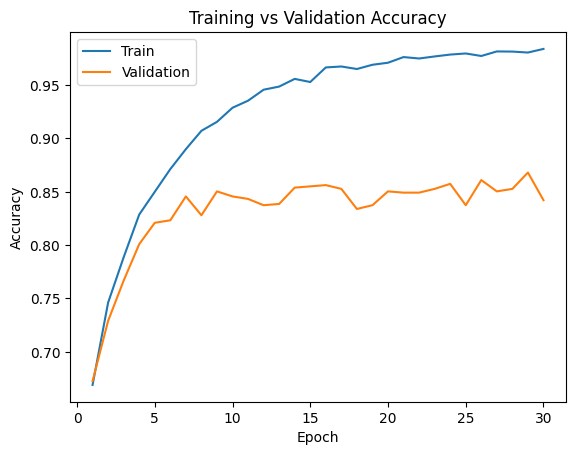

In [ ]:
testingModel = BrainTumorClassifier(name="BrainTumorCNN_channel_10_20_30_kernal_5", conv1_args=[3,10,5,1,0], conv2_args=[10,20,5,1,0], conv3_args=[20,30,5,1,0])
train_net(testingModel, batch_size = 256, learning_rate = 0.0005, num_epochs=30)
model_path = get_model_name("BrainTumorCNN_channel_10_20_30_kernal_5", batch_size=256, learning_rate=0.0005, epoch=29)
plot_training_curve(model_path)

# Code to get a few images from the testing folder to check the accuracy of the current best **models**

In [ ]:
source_directory = '/content/gdrive/MyDrive/Colab Notebooks/APS360/Project/Testing'
destination_directory = '/content/gdrive/MyDrive/Colab Notebooks/APS360/Project/Small_test'
shutil.rmtree(destination_directory)
os.makedirs(destination_directory, exist_ok=True)
num_pics = 1
# Function to copy all contents, including subdirectories
for folder in os.listdir(source_directory):
  dest_folder = os.path.join(destination_directory, folder)
  os.makedirs(dest_folder, exist_ok=True)
  source_folder = os.path.join(source_directory, folder)
  imgs = os.listdir(source_folder)
  for num in range(num_pics):
    i = random.randint(0, len(imgs)-1)
    source_file = os.path.join(source_folder, imgs[i])
    shutil.copy(source_file, dest_folder)

In [ ]:
net = BrainTumorClassifier(name="BrainTumorCNN_channel_10_20_30_kernal_5", conv1_args=[3,10,5,1,0], conv2_args=[10,20,5,1,0], conv3_args=[20,30,5,1,0])
model_path= get_model_name(net.name, batch_size=128, learning_rate=0.001, epoch=12)
state = torch.load(model_path)
net.load_state_dict(state)

criterion = nn.CrossEntropyLoss()
test_loader = get_data_loader(batch_size=1, small=True)

test_error, test_loss = evaluate(net, test_loader, criterion)
print(f"The test accuracy is {1-test_error}")
print(f"The test loss is {test_loss}")

Batch 0, Item 0: Predicted = notumor, Ground Truth = glioma
Batch 1, Item 0: Predicted = notumor, Ground Truth = meningioma
Batch 2, Item 0: Predicted = notumor, Ground Truth = notumor
Batch 3, Item 0: Predicted = notumor, Ground Truth = pituitary
The test accuracy is 0.25
The test loss is 18.33578982949257


In [ ]:
net = BrainTumorClassifier(name="BrainTumorCNN_channel_10_20_30_kernal_5", conv1_args=[3,10,5,1,0], conv2_args=[10,20,5,1,0], conv3_args=[20,30,5,1,0])
model_path= get_model_name(net.name, batch_size = 256, learning_rate = 0.0005, epoch=15)
state = torch.load(model_path)
net.load_state_dict(state)

criterion = nn.CrossEntropyLoss()
test_loader = get_data_loader(batch_size=1, small=True)

test_error, test_loss = evaluate(net, test_loader, criterion)
print(f"The test accuracy is {1-test_error}")
print(f"The test loss is {test_loss}")

Batch 0, Item 0: Predicted = pituitary, Ground Truth = glioma
Batch 1, Item 0: Predicted = pituitary, Ground Truth = meningioma
Batch 2, Item 0: Predicted = notumor, Ground Truth = notumor
Batch 3, Item 0: Predicted = pituitary, Ground Truth = pituitary
The test accuracy is 0.5
The test loss is 1.2705272436141968


# Alex Net


In [15]:
import torchvision.models
alexnet = torchvision.models.alexnet(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:02<00:00, 89.8MB/s]


In [16]:
def alex_clear_destination_folders():
    training_path = "./Alex_Train"
    validation_path = "./Alex_Validation"
    testing_path = "./Alex_Test"

    shutil.rmtree(training_path)
    shutil.rmtree(validation_path)
    shutil.rmtree(testing_path)

In [17]:
def alex_save_features():
  # Clean up directory if necessary
  alex_clear_destination_folders()

  # Define the root directory where your data is located
  root_dir = "./"

  # Define the directory containing the data
  data_dir = os.path.join(root_dir, "All_data/")

  # Get a list of folders (types) in the data directory
  folder_list = os.listdir(data_dir)

  # Define the directories for training, validation, and testing sets
  training_dir = os.path.join(root_dir, "Alex_Train/")
  validation_dir = os.path.join(root_dir, "Alex_Validation/")
  testing_dir = os.path.join(root_dir, "Alex_Test/")

  # Create training, validation, and testing directories if they don't exist
  os.makedirs(training_dir, exist_ok=True)
  os.makedirs(validation_dir, exist_ok=True)
  os.makedirs(testing_dir, exist_ok=True)

  # Copy existing images into the newly created folders
  for folder in folder_list:

      # Create subdirectories for each letter in training, validation, and testing sets
      training_letter_folder = os.path.join(training_dir, folder)
      validation_letter_folder = os.path.join(validation_dir, folder)
      testing_letter_folder = os.path.join(testing_dir, folder)

      os.makedirs(training_letter_folder + "/")
      os.makedirs(validation_letter_folder + "/")
      os.makedirs(testing_letter_folder + "/")

  train_loader, val_loader, test_loader = get_data_loader(batch_size=1, small=False)

  # Training features
  for i, data in enumerate(train_loader, 0):
    inputs, labels = data
    features_tensor = torch.from_numpy(alexnet.features(inputs).detach().numpy())
    torch.save(features_tensor.squeeze(0), training_dir + "/" + folder_list[labels] + "/alex_" + str(i) + ".data")

  # Validation features
  for i, data in enumerate(val_loader, 0):
    inputs, labels = data
    features_tensor = torch.from_numpy(alexnet.features(inputs).detach().numpy())
    torch.save(features_tensor.squeeze(0), validation_dir + "/" + folder_list[labels] + "/alex_" + str(i) + ".data")

  # Testing features
  for i, data in enumerate(test_loader, 0):
    inputs, labels = data
    features_tensor = torch.from_numpy(alexnet.features(inputs).detach().numpy())
    torch.save(features_tensor.squeeze(0), testing_dir + "/" + folder_list[labels] + "/alex_" + str(i) + ".data")


In [ ]:
alex_save_features()

In [18]:
class Alex_NN(nn.Module):
  def __init__(self, name="Alex_NN"):
    super(Alex_NN, self).__init__()
    self.name = name

    self.conv1 = nn.Conv2d(in_channels=256, out_channels=600, kernel_size=1)
    self.linear1 = nn.Linear(6*6*600, 50)
    self.linear2 = nn.Linear(50, 4)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = x.view(-1, 6*6*600)
    x = F.relu(self.linear1(x))
    x = self.linear2(x)
    return x

In [19]:
def get_alex_data_loaders(batch_size=128):
  training_path = "./Alex_Train"
  validation_path = "./Alex_Validation"
  testing_path = "./Alex_Test"

  training_features = torchvision.datasets.DatasetFolder(root=training_path, loader=torch.load, extensions=(".data"))
  validation_features = torchvision.datasets.DatasetFolder(root=validation_path, loader=torch.load, extensions=(".data"))
  testing_features = torchvision.datasets.DatasetFolder(root=testing_path, loader=torch.load, extensions=(".data"))

  training_loader = torch.utils.data.DataLoader(training_features, batch_size=batch_size, shuffle=True, num_workers=1)
  validation_loader = torch.utils.data.DataLoader(validation_features, batch_size=batch_size, shuffle=True, num_workers=1)
  testing_loader = torch.utils.data.DataLoader(testing_features, batch_size=batch_size, shuffle=True, num_workers=1)

  return training_loader, validation_loader, testing_loader

In [20]:
def train_alex(net, batch_size=64, learning_rate=0.01, num_epochs=30, clear=True):
    ########################################################################
    # Fixed PyTorch random seed for reproducible result
    torch.manual_seed(1000)
    ########################################################################
    # Obtain the PyTorch data loader objects to load batches of the datasets
    train_loader, val_loader, test_loader = get_alex_data_loaders(batch_size=batch_size)
    ########################################################################
    # Define the Loss function and optimizer
    # The loss function will be Cross Entropy (CE). In this case we
    # will use the CrossEntropyLoss.
    # Optimizer will be Adam optimizer.
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(net.parameters(), lr=learning_rate)
    ########################################################################
    # Set up some numpy arrays to store the training/test loss/erruracy
    train_err = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_err = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)


    trainingAccuracy = np.zeros(num_epochs)
    validationAccuracy = np.zeros(num_epochs)
    ########################################################################
    # Train the network
    # Loop over the data iterator and sample a new batch of training data
    # Get the output from the network, and optimize our loss function.
    start_time = time.time()
    for epoch in range(num_epochs):  # loop over the dataset multiple times
        total_train_loss = 0.0
        total_train_err = 0.0
        totalTrainingAccuracy = 0.0
        total_epoch = 0
        for i, data in enumerate(train_loader, 0):
            # Get the inputs
            inputs, labels = data

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass, backward pass, and optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            # Calculate the statistics
            corr = torch.argmax(outputs, dim=1) != labels
            total_train_err += int(corr.sum())
            total_train_loss += loss.item()
            total_epoch += len(labels)
        train_err[epoch] = float(total_train_err) / total_epoch
        train_loss[epoch] = float(total_train_loss) / (i+1)
        trainingAccuracy[epoch] = get_accuracy(net, train_loader)
        validationAccuracy[epoch] = get_accuracy(net, val_loader)
        val_err[epoch], val_loss[epoch] = evaluate(net, val_loader, criterion)
        print(("Epoch {}: Train err: {}, Train loss: {}, Training Accuracy: {} |"+
              "Validation err: {}, Validation loss: {}, Validation Accuracy: {}").format(
                  epoch + 1,
                  train_err[epoch],
                  train_loss[epoch],
                  trainingAccuracy[epoch],
                  val_err[epoch],
                  val_loss[epoch],
                  validationAccuracy[epoch]))
        # Save the current model (checkpoint) to a file
        model_path = get_model_name(net.name, batch_size, learning_rate, epoch)
        torch.save(net.state_dict(), model_path)
        # if epoch >= num_epochs -1:
        #   torch.save(net.state_dict(), model_path)
    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))
    # Write the train/test loss/err into CSV file for plotting later
    epochs = np.arange(1, num_epochs + 1)
    np.savetxt("{}_train_err.csv".format(model_path), train_err)
    np.savetxt("{}_train_loss.csv".format(model_path), train_loss)
    np.savetxt("{}_trainingAccuracy.csv".format(model_path), trainingAccuracy)
    np.savetxt("{}_val_err.csv".format(model_path), val_err)
    np.savetxt("{}_val_loss.csv".format(model_path), val_loss)
    np.savetxt("{}_validationAccuracy.csv".format(model_path), validationAccuracy)


percentage of False Negatives: 0.08
Epoch 1: Train err: 0.33375, Train loss: 0.9187513729557395, Training Accuracy: 0.838625 |Validation err: 0.168, Validation loss: 0.49901824444532394, Validation Accuracy: 0.832
percentage of False Negatives: 0.12
Epoch 2: Train err: 0.134125, Train loss: 0.37241865834221244, Training Accuracy: 0.9035 |Validation err: 0.111, Validation loss: 0.3184066228568554, Validation Accuracy: 0.889
percentage of False Negatives: 0.072
Epoch 3: Train err: 0.090875, Train loss: 0.25197335006669164, Training Accuracy: 0.9405 |Validation err: 0.093, Validation loss: 0.24582979455590248, Validation Accuracy: 0.907
percentage of False Negatives: 0.108
Epoch 4: Train err: 0.05775, Train loss: 0.17347342823632061, Training Accuracy: 0.953 |Validation err: 0.084, Validation loss: 0.24639040604233742, Validation Accuracy: 0.916
percentage of False Negatives: 0.18
Epoch 5: Train err: 0.043125, Train loss: 0.13086195779033005, Training Accuracy: 0.938375 |Validation err: 0

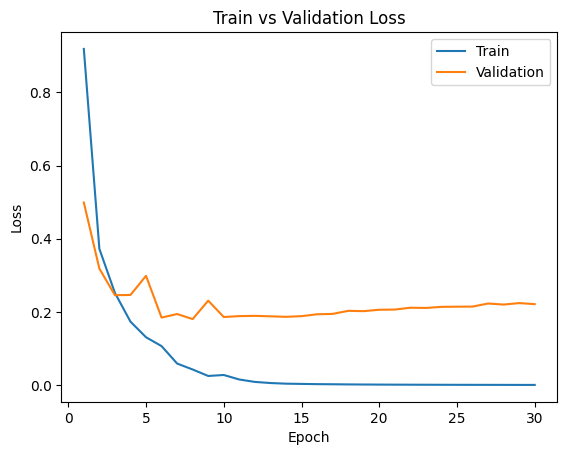

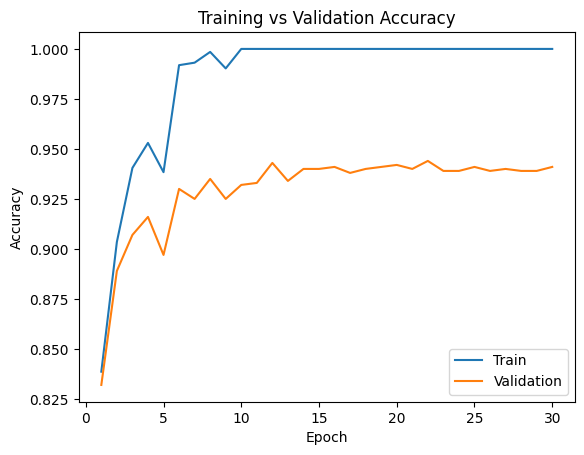

In [ ]:
alex_nn = Alex_NN()
train_alex(alex_nn, batch_size=256, learning_rate=0.001, num_epochs=30)

model_path = get_model_name(alex_nn.name, batch_size=256, learning_rate=0.001, epoch=29)
plot_training_curve(model_path)

In [ ]:
net = Alex_NN()
model_path = get_model_name(net.name, batch_size=256, learning_rate=0.001, epoch=14)
state = torch.load(model_path)
net.load_state_dict(state)

criterion = nn.CrossEntropyLoss()
train_loader, val_loader, test_loader = get_alex_data_loaders(batch_size=256)

test_error, test_loss = evaluate(net, test_loader, criterion)
print(f"The test accuracy is {1-test_error}")
print(f"The test loss is {test_loss}")

percentage of False Negatives: 0.06827309236947791
The test accuracy is 0.9368104312938816
The test loss is 0.2032073363661766


In [36]:
class Alex_NN_Drop(nn.Module):
  def __init__(self, name="Alex_NN_Drop"):
    super(Alex_NN_Drop, self).__init__()
    self.name = name
    self.conv1 = nn.Conv2d(in_channels=256, out_channels=600, kernel_size=1)
    self.linear1 = nn.Linear(6*6*600, 10000)
    self.linear2 = nn.Linear(10000, 1000)
    self.linear3 = nn.Linear(1000, 50)
    self.linear4 = nn.Linear(50, 4)
    self.dropout_fc = nn.Dropout(0.5)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = x.view(-1, 6*6*600)
    x = F.relu(self.linear1(x))
    x = self.dropout_fc(x)
    x = self.linear2(x)
    x = self.dropout_fc(x)
    x = self.linear3(x)
    x = self.dropout_fc(x)
    x = self.linear4(x)
    return x

percentage of False Negatives: 0.216
Epoch 1: Train err: 0.479625, Train loss: 4.222156910225749, Training Accuracy: 0.767 |Validation err: 0.245, Validation loss: 0.5942902863025665, Validation Accuracy: 0.769
percentage of False Negatives: 0.088
Epoch 2: Train err: 0.170875, Train loss: 0.45587109262123704, Training Accuracy: 0.895625 |Validation err: 0.146, Validation loss: 0.38091131299734116, Validation Accuracy: 0.86
percentage of False Negatives: 0.08
Epoch 3: Train err: 0.09075, Train loss: 0.26315646432340145, Training Accuracy: 0.952125 |Validation err: 0.102, Validation loss: 0.2963690534234047, Validation Accuracy: 0.894
percentage of False Negatives: 0.104
Epoch 4: Train err: 0.044, Train loss: 0.13825749629177153, Training Accuracy: 0.982 |Validation err: 0.089, Validation loss: 0.26522592455148697, Validation Accuracy: 0.907
percentage of False Negatives: 0.044
Epoch 5: Train err: 0.02, Train loss: 0.07172009523492306, Training Accuracy: 0.9915 |Validation err: 0.094, Va

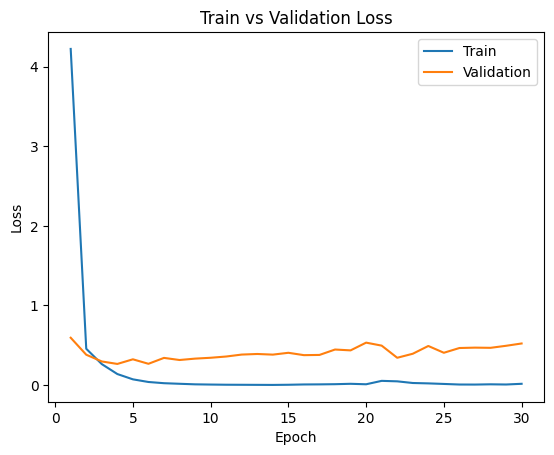

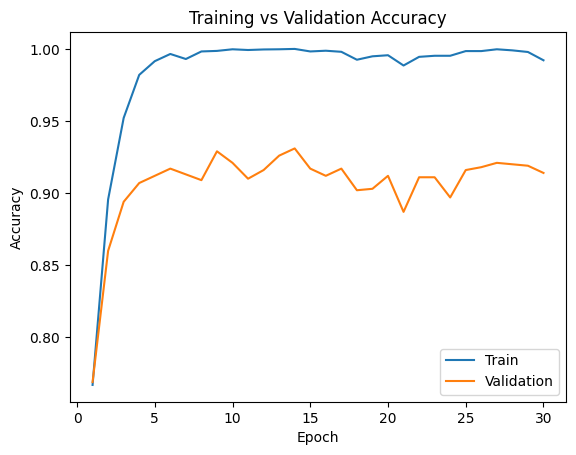

In [ ]:
alex_nn = Alex_NN_Drop()
train_alex(alex_nn, batch_size=256, learning_rate=0.001, num_epochs=30)

model_path = get_model_name(alex_nn.name, batch_size=256, learning_rate=0.001, epoch=29)
plot_training_curve(model_path)

In [ ]:
net = Alex_NN_Drop()
model_path = get_model_name(net.name, batch_size=256, learning_rate=0.001, epoch=9)
state = torch.load(model_path)
net.load_state_dict(state)

criterion = nn.CrossEntropyLoss()
train_loader, val_loader, test_loader = get_alex_data_loaders(batch_size=256)

test_error, test_loss = evaluate(net, test_loader, criterion)
print(f"The test accuracy is {1-test_error}")
print(f"The test loss is {test_loss}")

percentage of False Negatives: 0.06827309236947791
The test accuracy is 0.9237713139418254
The test loss is 0.3949885815382004


percentage of False Negatives: 0.32
Epoch 1: Train err: 0.49075, Train loss: 2.1436074897646904, Training Accuracy: 0.73 |Validation err: 0.272, Validation loss: 0.6791076958179474, Validation Accuracy: 0.723
percentage of False Negatives: 0.072
Epoch 2: Train err: 0.192625, Train loss: 0.5169455297291279, Training Accuracy: 0.8725 |Validation err: 0.139, Validation loss: 0.38321907818317413, Validation Accuracy: 0.869
percentage of False Negatives: 0.088
Epoch 3: Train err: 0.10575, Train loss: 0.30017190566286445, Training Accuracy: 0.92825 |Validation err: 0.102, Validation loss: 0.31621547788381577, Validation Accuracy: 0.895
percentage of False Negatives: 0.048
Epoch 4: Train err: 0.067875, Train loss: 0.19093054439872503, Training Accuracy: 0.958 |Validation err: 0.083, Validation loss: 0.25858644768595695, Validation Accuracy: 0.902
percentage of False Negatives: 0.028
Epoch 5: Train err: 0.038375, Train loss: 0.12114375759847462, Training Accuracy: 0.97575 |Validation err: 0.07

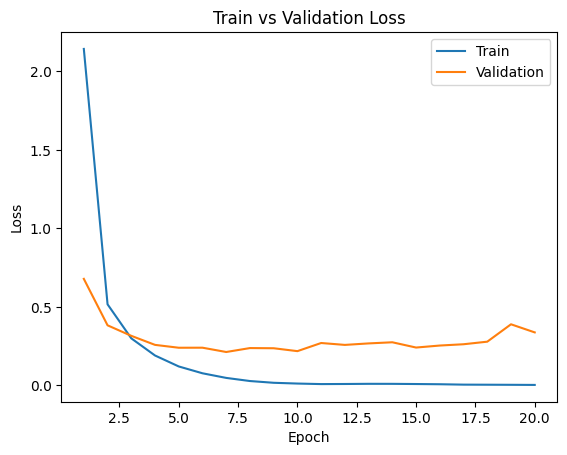

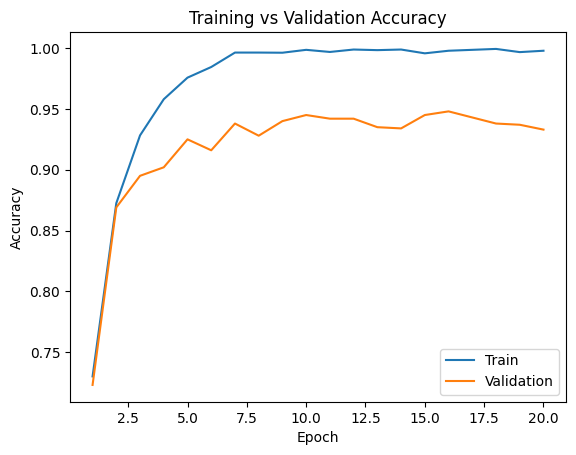

In [ ]:
alex_nn = Alex_NN_Drop(name="Alex_NN_Drop_lr_0.0005")
train_alex(alex_nn, batch_size=256, learning_rate=0.0005, num_epochs=20)

model_path = get_model_name(alex_nn.name, batch_size=256, learning_rate=0.0005, epoch=19)
plot_training_curve(model_path)

In [ ]:
net = Alex_NN_Drop(name="Alex_NN_Drop_lr_0.0005")
model_path = get_model_name(net.name, batch_size=256, learning_rate=0.0005, epoch=17)
state = torch.load(model_path)
net.load_state_dict(state)

criterion = nn.CrossEntropyLoss()
train_loader, val_loader, test_loader = get_alex_data_loaders(batch_size=256)

test_error, test_loss = evaluate(net, test_loader, criterion)
print(f"The test accuracy is {1-test_error}")
print(f"The test loss is {test_loss}")

[[215   8   7  19]
 [  3 245   2   0]
 [  3   0 239   7]
 [ 12   0   4 233]]
percentage of False Negatives: 0.040160642570281124
The test accuracy is 0.9348044132397192
The test loss is 0.34178220480680466


In [33]:
def alex_save_features_out():
  # Clean up directory if necessary
  alex_clear_destination_folders()

  # Define the root directory where your data is located
  root_dir = "./"

  # Define the directory containing the data
  data_dir = os.path.join(root_dir, "Outside_test_single/")

  # Get a list of folders (types) in the data directory
  folder_list = os.listdir(data_dir)

  # Define the directories for training, validation, and testing sets
  dir = os.path.join(root_dir, "Alex_out/")

  # Create training, validation, and testing directories if they don't exist
  os.makedirs(dir, exist_ok=True)

  # Copy existing images into the newly created folders
  for folder in folder_list:

      # Create subdirectories for each letter in training, validation, and testing sets
      sub_folder = os.path.join(dir, folder)

      os.makedirs(sub_folder + "/")

  loader = get_data_loader_out(batch_size=1)

  # Training features
  for i, data in enumerate(loader, 0):
    inputs, labels = data
    features_tensor = torch.from_numpy(alexnet.features(inputs).detach().numpy())
    torch.save(features_tensor.squeeze(0), dir + "/" + folder_list[labels] + "/alex_" + str(i) + ".data")


alex_save_features_out()


# Outside Dataset

In [21]:
def clear():
  path = "./Outside_test_single"

  # Check if the folders exist before deleting them
  if os.path.exists(path):
      shutil.rmtree(path)


In [54]:
def preprocess_out():

    clear()

    # Define the root directory where your data is located
    root_dir = "./"

    # Define the directory containing the original data
    data_dir = os.path.join(root_dir, "Outside_test/")

    # Get a list of folders (classes of tumor) in the data directory
    folder_list = os.listdir(data_dir)

    # Define the directories for training, validation, and testing sets
    dir = os.path.join(root_dir, "Outside_test_single/")

    # Create training, validation, and testing directories if they don't exist
    os.makedirs(dir, exist_ok=True)

    IMG_SIZE = 224

    # Copy existing images into the newly created folders
    for folder in folder_list:

        # Create subdirectories for each tumor class in training, validation, and testing sets
        class_folder = os.path.join(dir, folder)

        os.makedirs(class_folder, exist_ok=True)

        # Get the path to the images of the current class
        images_path = os.path.join(data_dir, folder + '/')

        # List all the image files in the current class folder
        images_list = os.listdir(images_path)
        random.shuffle(images_list)



        print(len(images_list))
        for i in range(2):
          source = os.path.join(images_path, images_list[i])
          img = cv2.imread(source)
          new_img = crop_img(img)
          new_img = cv2.resize(new_img, (IMG_SIZE, IMG_SIZE))
          # Determine the destination based on the split ratio

          destination = os.path.join(class_folder, images_list[i])

          # Copy the new_img to the appropriate set
          cv2.imwrite(destination, new_img)

preprocess_out()

2499
2499
2499
2500


In [28]:
def get_data_loader_out(batch_size=1):

  root_dir = "./"

  # Define the directory containing the original data
  data_dir = os.path.join(root_dir, "Outside_test_single/")

  # Get a list of folders (classes of tumor) in the data directory
  folder_list = os.listdir(data_dir)

  transform = transforms.Compose(
        [transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

  dataset = torchvision.datasets.ImageFolder(root=data_dir, transform=transform)

  loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=1)


  return loader


In [29]:
def alex_clear_destination_folders():
    path = "./Alex_out"

    shutil.rmtree(path)

In [31]:
def get_alex_data_loaders_out(batch_size=1):
  path = "./Alex_out"

  features = torchvision.datasets.DatasetFolder(root=path, loader=torch.load, extensions=(".data"))

  loader = torch.utils.data.DataLoader(features, batch_size=batch_size, shuffle=True, num_workers=1)

  return loader

In [38]:
net = Alex_NN_Drop(name="Alex_NN_Drop_lr_0.0005")
model_path = get_model_name(net.name, batch_size=256, learning_rate=0.0005, epoch=17)
state = torch.load(model_path)
net.load_state_dict(state)

criterion = nn.CrossEntropyLoss()


In [55]:
alex_save_features_out()
test_loader = get_alex_data_loaders_out(batch_size=1)

test_error, test_loss = evaluate(net, test_loader, criterion)
print(f"The test accuracy is {1-test_error}")
print(f"The test loss is {test_loss}")

[[2 0 0 0]
 [0 2 0 0]
 [0 0 2 0]
 [0 0 0 2]]
True label:  pitutary Predicted label:  pitutary
True label:  glioma Predicted label:  glioma
True label:  no tumor Predicted label:  no tumor
True label:  no tumor Predicted label:  no tumor
True label:  pitutary Predicted label:  pitutary
True label:  meningioma Predicted label:  meningioma
True label:  glioma Predicted label:  glioma
True label:  meningioma Predicted label:  meningioma
percentage of False Negatives: 0.0
The test accuracy is 1.0
The test loss is 0.0007211018496482424
